In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/50_Startups.csv")

In [ ]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
#dependent feature: profit
#independent features:R&D Spend,	Administration,	Marketing Spend,	State

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.rename(columns={"R&D Spend":"rdspend","Marketing Spend":"marketingspend"},inplace=True)

In [ ]:
df.drop("State",axis=1,inplace=True)

In [ ]:
df.corr()

,rdspend,Administration,marketingspend,Profit
rdspend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
marketingspend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
#model 1

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model=smf.ols("Profit~rdspend+Administration+marketingspend",data=df).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           4.53e-30
Time:                        06:36:02   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rdspend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketingspend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#try simple linear reg for single independent features

In [ ]:
model2=smf.ols("Profit~Administration",data=df).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 26 Oct 2023   Prob (F-statistic):              0.162
Time:                        06:36:02   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model3=smf.ols("Profit~marketingspend",data=df).fit()

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           4.38e-10
Time:                        06:36:02   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
marketingspend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#model4 using multicollinearity

In [ ]:
#rdspend+marketingspend
model4=smf.ols("Profit~rdspend+marketingspend",data=df).fit()


In [ ]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           2.16e-31
Time:                        06:36:02   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
rdspend            0.7966      0.041     19.266      0.000       0.713       0.880
marketingspend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#rdspend+Administration

In [ ]:
model5=smf.ols("Profit~rdspend+Administration",data=df).fit()

In [ ]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           7.29e-31
Time:                        06:36:02   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
rdspend            0.8621      0.030     28.589      0.000       0.801       0.923
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#aic and r2 using rdspend,Administration
print(model5.aic)
print(model5.rsquared)


1059.6636934567293
0.9478129385009173


In [ ]:
#aic and r2 using rdspend,marketingspeed
print(model4.aic)
print(model4.rsquared)

1057.070772191826
0.9504503015559763


In [ ]:
#normality
import statsmodels.api as sm

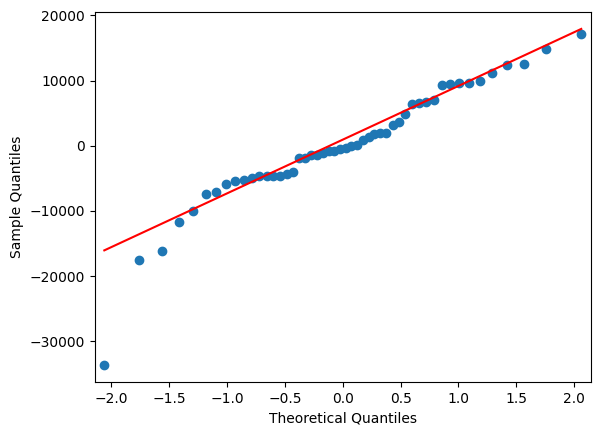

In [ ]:
qqplot=sm.qqplot(model4.resid,line="q")

In [ ]:
df1=pd.read_csv("/content/50_Startups.csv")

In [ ]:
df1.rename(columns={"Marketing Spend":"marketingspend","R&D Spend":"rdspend"},inplace=True)

In [ ]:
#find the outliers highly influcential values using cooksdistance

In [ ]:
ckd=model4.get_influence()
(cv,_)=ckd.cooks_distance

In [ ]:
ckd.cooks_distance

(array([1.81512394e-04, 2.17714151e-03, 3.85030256e-02, 2.97393985e-02,
        7.43914487e-03, 8.87288175e-03, 3.60799476e-03, 4.97976353e-03,
        2.01902031e-06, 4.00294501e-03, 1.64482064e-02, 1.07062146e-02,
        1.52583172e-02, 4.10195007e-03, 6.23696501e-02, 4.28041217e-02,
        1.08143179e-02, 3.37984862e-03, 2.70426509e-03, 5.18325214e-02,
        5.68610172e-04, 8.25784837e-03, 4.13103131e-03, 3.07888695e-04,
        2.54030757e-03, 2.87274239e-03, 4.56256249e-03, 3.76461096e-02,
        4.04646886e-06, 3.84226278e-04, 1.54537882e-04, 1.49920702e-04,
        7.91098475e-04, 7.81029691e-05, 6.23157729e-03, 6.50961158e-03,
        5.60674443e-02, 5.62367665e-04, 4.68122817e-02, 5.47791686e-04,
        2.06083678e-03, 2.68539324e-03, 3.32631540e-04, 2.55928157e-02,
        2.50014790e-05, 1.17553495e-01, 7.74416953e-02, 7.99827600e-03,
        5.61942095e-02, 3.89488623e-01]),
 array([0.99999657, 0.99985768, 0.98977563, 0.99300145, 0.99910561,
        0.99883656, 0.9996

<StemContainer object of 3 artists>

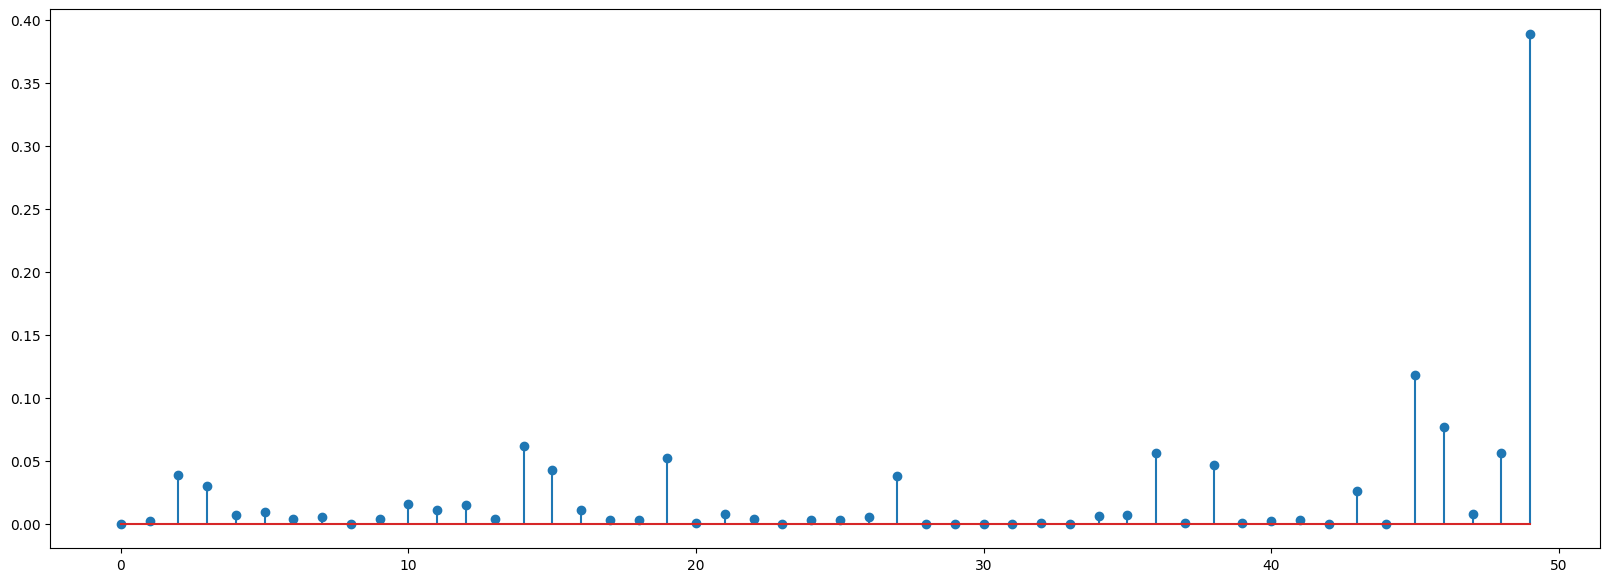

In [ ]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(cv,3))

In [ ]:
len(df1)

50

In [ ]:
(np.argmax(cv),np.max(cv))

(49, 0.3894886227924922)

In [ ]:
df1.drop(df1.index[49],axis=0,inplace=True)
df1=df1.reset_index()

In [ ]:
df1

,index,rdspend,Administration,marketingspend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
df1.drop("index",axis=1,inplace=True)

In [ ]:
#rebuild


In [ ]:
mod1=smf.ols("Profit~rdspend+marketingspend",data=df1).fit()

In [ ]:
ckd=mod1.get_influence()
(cv,_)=ckd.cooks_distance

<StemContainer object of 3 artists>

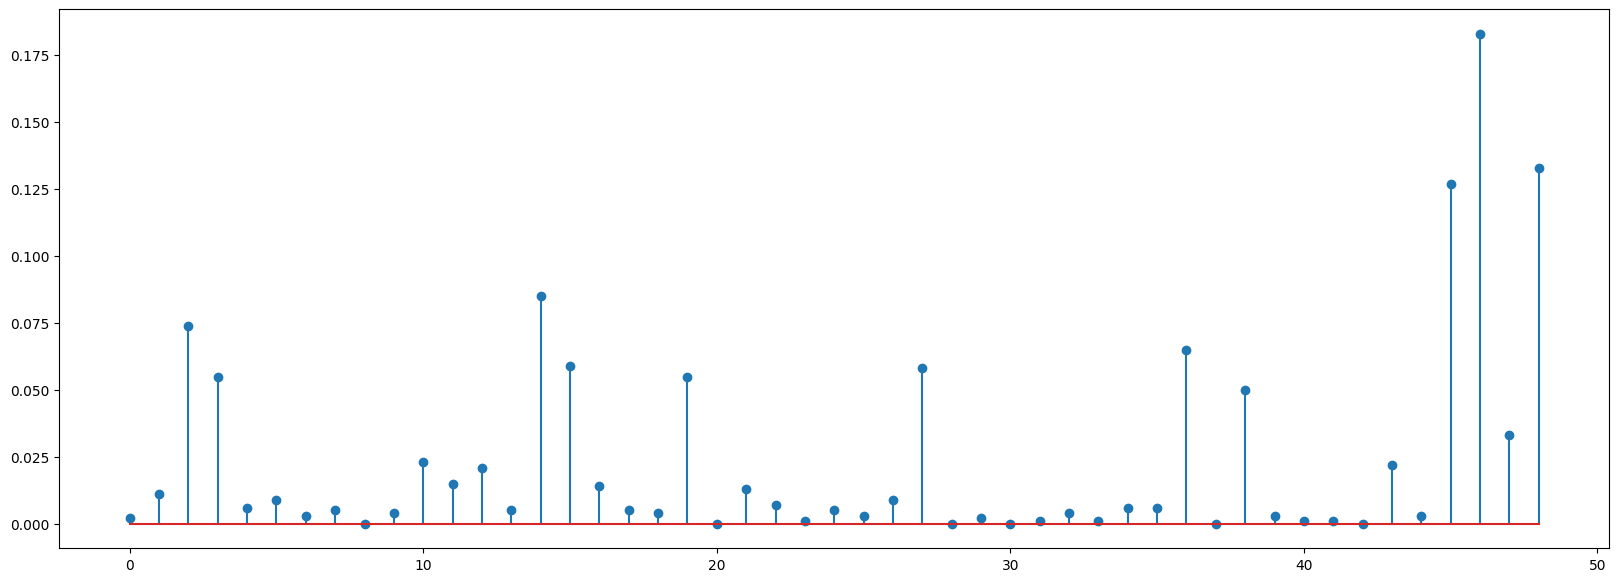

In [ ]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(cv,3))

In [ ]:
(np.argmax(cv),np.max(cv))

(46, 0.18337556491338694)

In [ ]:
#since the cv(cooks distance)<1we can stop the diagonstics
finalmodel=smf.ols("Profit~rdspend+marketingspend",data=df1).fit()

In [ ]:
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           3.74e-33
Time:                        06:36:06   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
rdspend            0.7754      0.035     22.136      0.000       0.705       0.846
marketingspend     0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df1

,rdspend,Administration,marketingspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


TOYOTA COROLLA

In [ ]:
df=pd.read_csv("/content/ToyotaCorolla.csv",encoding="latin1")

In [ ]:
pd.set_option('display.max_columns', None)
print(df)

        Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color   Color  \
0            23         10      2002  46986    Diesel 

In [ ]:
df1=df.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [ ]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [ ]:
df1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
#model

In [ ]:
model=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight",data=df1).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1284.
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        08:00:47   Log-Likelihood:                -12380.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1428   BIC:                         2.482e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2750.5553   1059.491     -2.596      0.010   -4828.881    -672.229
Age_08_04      -121.7928      2.623    -46.439      0.000    -126.937    -116.648
KM               -0.0205      0.001    -16.395      0.000      -0.023      -0.018
HP               33.7306      2.743     12.297      0.000      28.350      39.111
cc               -0.1251      0.090     -1.385      0.166      -0.302       0.052
Doors           -24.5339     39.389     -0.623      0.533    -101.799      52.732
Quarterly_Tax     4.1227      1.312      3.141      0.002       1.548       6.697
Weight           16.9852      1.071     15.860      0.000      14.884      19.086
==============================================================================
Omnibus:                      151.778   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              992.853
Skew:                          -0.231   Prob(JB):                    2.54e-216
Kurtosis:                       7.047   Cond. No.                     2.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#model1, taking out cc and doors as their p value is above .05

In [ ]:
model1=smf.ols("Price~Age_08_04+KM+HP+Quarterly_Tax+Weight",data=df1).fit()

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1797.
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        08:03:07   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1430   BIC:                         2.481e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2554.4355   1048.246     -2.437      0.015   -4610.700    -498.171
Age_08_04      -121.8366      2.623    -46.454      0.000    -126.981    -116.692
KM               -0.0207      0.001    -16.543      0.000      -0.023      -0.018
HP               33.3411      2.731     12.209      0.000      27.984      38.698
Quarterly_Tax     3.9716      1.298      3.060      0.002       1.425       6.518
Weight           16.5860      1.022     16.224      0.000      14.581      18.591
==============================================================================
Omnibus:                      144.527   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              910.235
Skew:                          -0.209   Prob(JB):                    2.21e-198
Kurtosis:                       6.878   Cond. No.                     2.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import statsmodels.api as sm

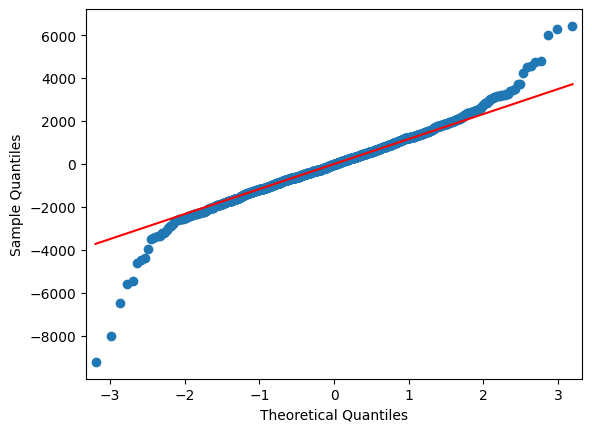

In [ ]:
qqplot=sm.qqplot(model1.resid,line="q")

In [ ]:
#find the outliers highly influcential values using cooksdistance

In [ ]:
df2=pd.read_csv("/content/ToyotaCorolla.csv",encoding="latin1")

In [ ]:
cd=model1.get_influence()
(cv,_)=cd.cooks_distance

In [ ]:
cd.cooks_distance

(array([9.28724338e-03, 5.04758471e-03, 7.04923207e-03, ...,
        3.66194900e-06, 9.28501604e-04, 1.58859706e-02]),
 array([0.99999646, 0.99999943, 0.99999844, ..., 1.        , 1.        ,
        0.99998252]))

<StemContainer object of 3 artists>

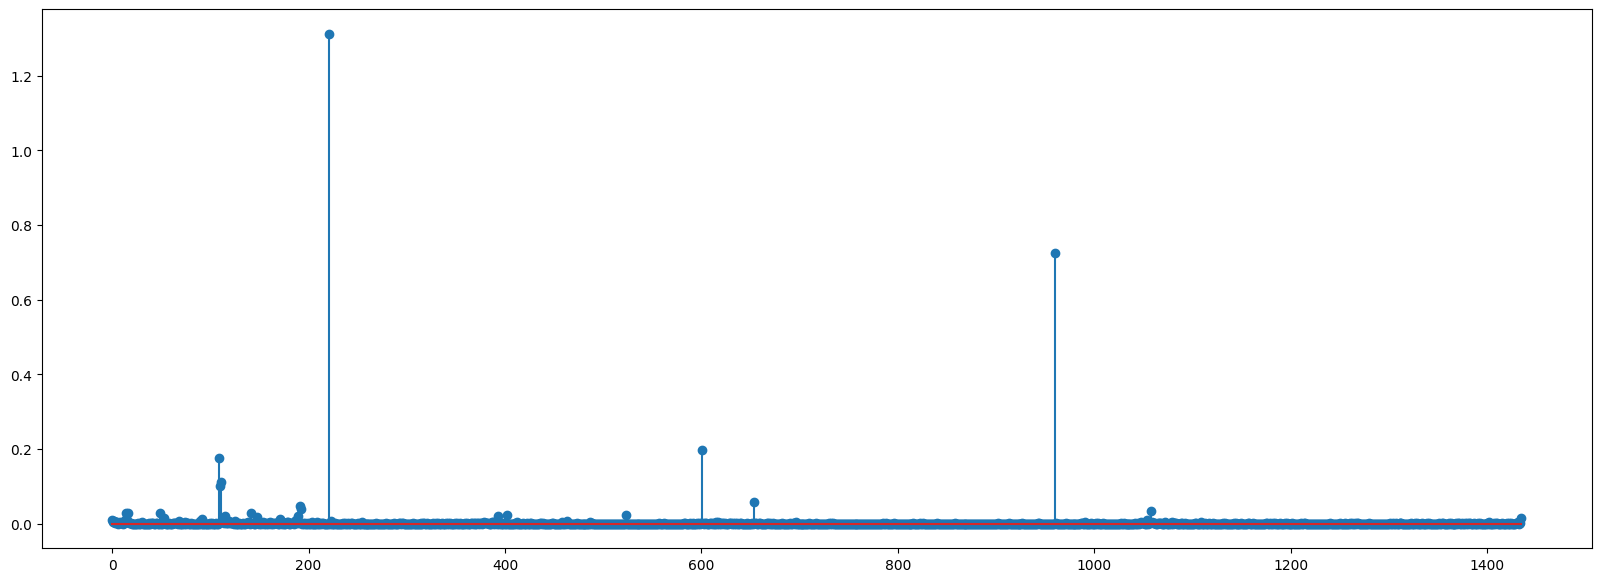

In [ ]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(cv,3))

In [ ]:
(np.argmax(cv),np.max(cv))

(221, 1.3115552794479086)

In [ ]:
df1.drop(df1.index[221],axis=0,inplace=True)
df1=df1.reset_index()

<ipython-input-140-ba5bbd5b6a5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1.index[221],axis=0,inplace=True)


In [ ]:
#rebuilding model

In [ ]:
mod1=smf.ols("Price~Age_08_04+KM+HP+Quarterly_Tax+Weight",data=df1).fit()

In [ ]:
ckd=mod1.get_influence()
(cv,_)=ckd.cooks_distance

In [ ]:
ckd.cooks_distance

(array([9.53046657e-03, 5.13999451e-03, 7.23767914e-03, ...,
        9.01587039e-06, 9.00166391e-04, 2.08524143e-02]),
 array([0.99999617, 0.99999939, 0.99999831, ..., 1.        , 1.        ,
        0.99996091]))

<StemContainer object of 3 artists>

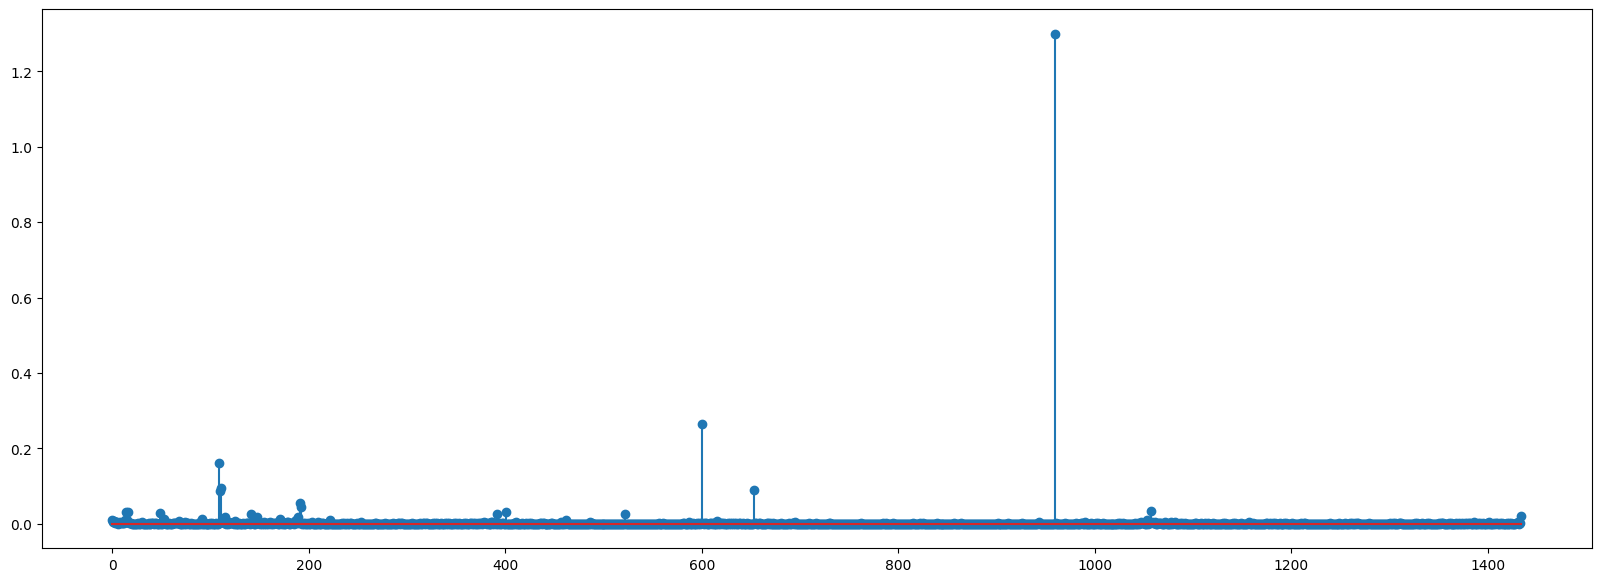

In [ ]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(cv,3))

In [ ]:
(np.argmax(cv),np.max(cv))

(959, 1.3000379810667568)

In [ ]:
df1.drop(df1.index[959],axis=0,inplace=True)
df1=df1.reset_index()

In [ ]:
#rebuilding new model

In [ ]:
mod2=smf.ols("Price~Age_08_04+KM+HP+Quarterly_Tax+Weight",data=df1).fit()

In [ ]:
ckd=mod2.get_influence()
(cv,_)=ckd.cooks_distance

<StemContainer object of 3 artists>

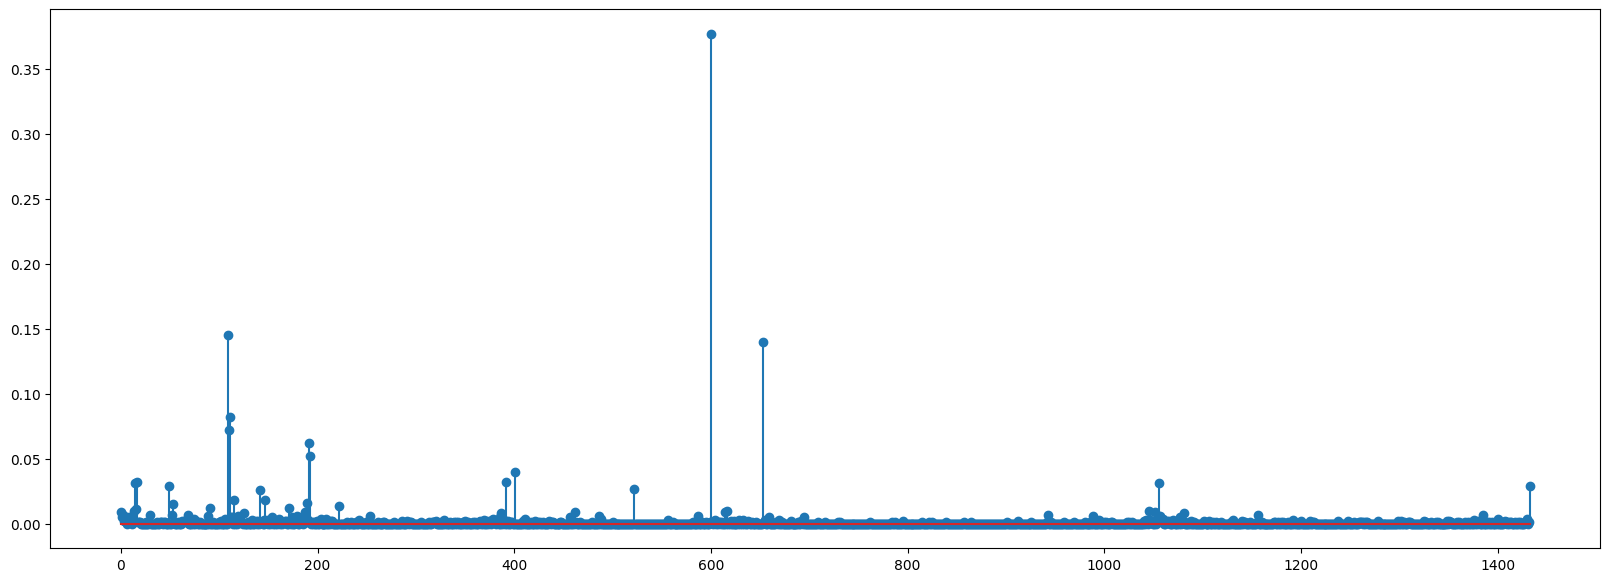

In [ ]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(cv,3))

In [ ]:
(np.argmax(cv),np.max(cv))

(600, 0.37712503996353175)

In [ ]:
#since the cv(cooks distance)<1we can stop the diagonstics

In [ ]:
finalmodel=smf.ols("Price~Age_08_04+KM+HP+Quarterly_Tax+Weight",data=df1).fit()

In [ ]:
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1939.
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        08:30:41   Log-Likelihood:                -12317.
No. Observations:                1434   AIC:                         2.465e+04
Df Residuals:                    1428   BIC:                         2.468e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8122.1523   1159.672     -7.004      0.000   -1.04e+04   -5847.309
Age_08_04      -116.2867      2.599    -44.736      0.000    -121.386    -111.188
KM               -0.0212      0.001    -17.508      0.000      -0.024      -0.019
HP               28.4174      2.696     10.540      0.000      23.129      33.706
Quarterly_Tax    -0.4499      1.339     -0.336      0.737      -3.077       2.177
Weight           22.3599      1.150     19.447      0.000      20.104      24.615
==============================================================================
Omnibus:                      126.082   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.172
Skew:                          -0.215   Prob(JB):                    6.56e-142
Kurtosis:                       6.270   Cond. No.                     2.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""